# Bitcoin

Le bitcoin est une monnaie dématérialisée et décentralisée. Elle repose sur deux principes informatiques : la cryptographie à clé publique et la preuve de travail. Pour comprendre ce second principe, tu vas créer un modèle simple de bitcoin.

## Activité 1 (Preuve de travail).

Objectifs : comprendre ce qu’est une preuve de travail sur un modèle simple. 

Cette activité est
indépendante du reste de la fiche. L’idée est de trouver un problème difficile à résoudre mais facile
à vérifier.  
Comme les sudokus par exemple : il suffit de dix secondes pour vérifier qu’une grille est
remplie correctement, par contre il a fallu plus de dix minutes pour le résoudre.  
Le problème mathématique est le suivant : on te donne un nombre premier p et un entier y ; tu dois
trouver un entier $x$ tel que :
$x^2 = y $ (mod p)  
Autrement dit $x$ est une racine carrée de $y$ modulo p. 
 Attention, il n’existe pas toujours de solution pour
x

## Exemples.  
• Pour p = 13 et y = 10, alors une solution est x = 6. Effet $x^2$ = 62 = 36. Et 36 = 2 × 13 + 10 donc
$x^2$ = 10 (mod 13).  
• La solution n’est pas forcément unique. Par exemple, vérifie que x = 7 est aussi solution.  
• Il n’y a pas toujours de solution, par exemple pour p = 13 et y = 5, aucun entier x n’est solution.  
• Exercice : pour p = 13, trouve à la main deux solutions x au problème x2 = 9 (mod 13) ; trouve une
solution x au problème $x^2$ = 3 (mod 13).
L’entier p est fixé pour toute l’activité.  
Pour les exemples faciles on prendra p = 101, pour les exemples
moyens p = 15486 869 et pour les exemples difficiles p = 2276 856017.   
Plus l’entier p est grand, plus
la preuve de travail est difficile à obtenir.
1. **Vérification (facile).** Écris une fonction **verification(x,y)** qui renvoie « vrai » si x est bien
solution du problème x2 = y (mod p) et « faux » sinon.
Vérifie que x = 6543210 est solution lorsque y = 8371779 et p = 15486869. Affiche le temps de
calcul nécessaire à cette vérification. (Voir le cours plus bas.)

In [18]:
from time import *

# p = 101  # Un petit nombre premier
# p = 1097
# p = 10651
# p = 100109
# p = 1300573
p = 15486869 # Un moyen nombre premier
# p = 179426321  
# p = 2276856017 # Un grand nombre premier
# p = 32416187567


## Question 1 ##
def verification(x,y):
    xcarre = (x ** 2) % p
    if xcarre == y:
        return True
    else:
        return False

# Test
print("--- Vérification x^2 = y modulo p ---")      
debut_chrono = time()
x = 6543210
# y = (x**2) % p; print(y)
y = 8371779  
print(verification(x,y))
fin_chrono = time()
total_chrono = fin_chrono - debut_chrono
print("Temps de calcul (en secondes) :",total_chrono)

--- Vérification x^2 = y modulo p ---
True
Temps de calcul (en secondes) : 0.0


 2.**Recherche de solution (difficile).** Pour trouver une solution x, il n’y a pas vraiment d’autres choix
pour nous que de tester tous les x en commençant par x = 0, x = 1...    
Programme une fonction
**racine(y)** qui renvoie une solution x du problème pour y donné (ou None s’il n’y a pas de solution).   
• Pour p = 101 et y = 17, trouve x tel que x2 = y (mod p).   
• Pour p = 15 486 869 et y = 8 371 779, tu dois retrouver le x de la première question.    
Combien de
temps a pris la recherche ?  
• Pour p = 15486 869 et y = 13 017204, trouve x tel que $x^2$ = y (mod p).

In [19]:
## Question 2 ##
def racine(y):
    for x in range(p):
        res = (x ** 2 - y) % p
        if res == 0:
            return x
    return None


def racine2(y,p):
    for x in range(p):
        res = (x ** 2 - y) % p
        if res == 0:
            return x
    return None
# Test
print("--- Recherche de x tq x^2 = y modulo p ---")  
for yp in [ [17,101] , [8371779,15486869] , [13017204,15486869] ]:
    debut_chrono = time()
    x = racine2(yp[0],yp[1])
    print("solution de x^2= ",yp[0]," mod ",yp[1], " est ",x)

    fin_chrono = time()
    total_chrono = fin_chrono - debut_chrono
    print("Temps de calcul (en secondes) :",total_chrono,"\n")

--- Recherche de x tq x^2 = y modulo p ---
solution de x^2=  17  mod  101  est  44
Temps de calcul (en secondes) : 0.0010025501251220703 

solution de x^2=  8371779  mod  15486869  est  6543210
Temps de calcul (en secondes) : 4.059792518615723 

solution de x^2=  13017204  mod  15486869  est  12345
Temps de calcul (en secondes) : 0.00601649284362793 



Conclusion : nous avons trouvé un problème difficile à résoudre, mais pour lequel il est facile de vérifier
qu’une solution donnée convient.   
Pour des valeurs de p plus grandes, la recherche d’une solution x peut
être beaucoup trop longue et ne pas aboutir. 

In [3]:
# long a executer 100 secondes !
"""debut_chrono = time()
x = racine2(200000000**2,32416187567)
print("solution de x^2= ",200000000**2," mod ",32416187567, " est ",x)
fin_chrono = time()
total_chrono = fin_chrono - debut_chrono
print("Temps de calcul (en secondes) :",total_chrono)"""

'debut_chrono = time()\nx = racine2(200000000**2,32416187567)\nprint("solution de x^2= ",200000000**2," mod ",32416187567, " est ",x)\nfin_chrono = time()\ntotal_chrono = fin_chrono - debut_chrono\nprint("Temps de calcul (en secondes) :",total_chrono)'

Nous allons voir comment on peut ajuster la difficulté du
problème.   
3. Au lieu de chercher une solution exacte à notre problème $x^2$ = y (mod p), qui est équivalent à $x^2$ − y
(mod p) = 0.    
On cherche une solution approchée, c’est-à-dire qui vérifie :
$$x^2 − y (mod p)  \leqslant m$$   
Par exemple si m = 5, alors on peut avoir (modulo p) :$x²$ − y = 0 ,  $ x²$ − y = 1 , $x²$ − y = 2 ,..., $x²$ − y = 5.    
Programme une fonction **racine_approchee(y,marge)** qui trouve une solution approchée à notre
problème $x^2$ = y (mod p).   
Combien de temps faut-il pour trouver un solution au problème approché lorsque p = 15486869,
y = 8 371 779 et m = 20 ?    
Choisis un nombre premier p assez grand et trouve une marge d’erreur m
de sorte que trouver une solution au problème approché nécessite environ entre 30 et 60 secondes
de calculs (pour un y quelconque).   
Voici des exemples de nombres premiers que tu peux utiliser pour tes essais :
101 1097 10651 100109 1300573 15486869 179426321 2276856017 32416187567


In [20]:
def racine_approchee(y,marge):
    for x in range(p):
        res = (x ** 2 - y) % p
        if res <= marge:
            return x        
    return None


print("--- Recherche approchée de x tq x^2 = y modulo p ---")  

debut_chrono = time()
p = 15486869
y = 8371779
marge = 20
x = racine_approchee(y,marge)
print("x =",x, "erreur =",(x**2-y) % p)

fin_chrono = time()
total_chrono = fin_chrono - debut_chrono
print("Temps de calcul de solution au problème approché lorsque p = 15486869, y = 8 371 779 et m = 20 ",total_chrono)



--- Recherche approchée de x tq x^2 = y modulo p ---
x = 413988 erreur = 11
Temps de calcul de solution au problème approché lorsque p = 15486869, y = 8 371 779 et m = 20  0.3669586181640625


In [5]:
#super long à executer
def racine_approchee2(y,marge):
    debut_chrono = time()
    for x in range(p):
        res = (x ** 2 - y) % p
        if res <= marge:
            total_chrono = time() - debut_chrono
            return total_chrono  
    total_chrono = time() - debut_chrono
    return total_chrono


"""p=2276856017
import random
marge=100
tps=[]
for j in range(100):
    y=random.randint(1,p)
    tps=tps+[racine_approchee2(y,marge)]"""


'p=2276856017\nimport random\nmarge=100\ntps=[]\nfor j in range(100):\n    y=random.randint(1,p)\n    tps=tps+[racine_approchee2(y,marge)]'

## Cours 1 (Chronomètre).
Le module time permet de chronométrer le temps d’exécution mais aussi de savoir la date et l’heure
(voir aussi le module timeit expliqué dans la fiche « Arithmétique – Tant que »). Voici un petit script
pour mesurer le temps de calcul d’une instruction.   

In [21]:
import time                 #Le module s’appelle time.   
"""La fonction time() renvoie un nombre qui ne nous intéresse pas. Ce qui nous intéresse c’est l’écart
entre deux valeurs de cette fonction."""
debut_chrono = time.time()   #c’est comme lancer un chronomètre.
time.sleep(2)               #fait une pause d’une certaine durée de secondes dans le programme.
fin_chrono = time.time()     # c’est comme l’arrêter. 
total_chrono = fin_chrono - debut_chrono # est la durée totale qu’a pris notre script en secondes.     
print("Temps d'exécution (en secondes) :", total_chrono) 


Temps d'exécution (en secondes) : 2.0004818439483643


## Cours 2 (Bitcoin et blockchain).
La monnaie bitcoin est une monnaie dématérialisée. Les transactions sont enregistrées dans un grand
livre de compte appelé blockchain. Nous allons construire un modèle (très simplifié) d’un tel livre de
compte.   
Imaginons un groupe d’amis qui souhaitent partager les dépenses du groupe de façon la plus simple
possible. Au départ tout le monde dispose de 1000 bitcoins et on note au fur et à mesure les dépenses et
les recettes de chacun.   
On note sur le livre de compte la liste des dépenses/recettes, par exemple :   
• « Amir a dépensé 100 bitcoins »   
• « Barbara a reçu 45 bitcoins »   
• etc.   
Il suffit de parcourir tout le livre pour savoir combien chacun a reçu ou dépensé depuis le début.
Pour éviter que quelqu’un ne vienne truquer le livre de compte, après chaque transaction on ajoute dans
le livre une certification construite à partir d’une preuve de travail. Voici ce que l’on écrit dans le livre   
1. On commence par une preuve de travail quelconque. Pour nous ce sera [0,0,0,0,0,0].   
2. On écrit la première transaction (par exemple "Amir -100").   
3. On calcule et on écrit dans le livre une preuve de travail, qui va servir de certificat. C’est une liste
(par exemple [56,42,10,98,2,34]) obtenue après beaucoup de calculs prenant en compte la
transaction précédente et la précédente preuve de travail.  
4. À chaque nouvelle transaction (par exemple "Barbara +45"), quelqu’un calcule une preuve de
travail pour la dernière transaction associée à la précédente preuve. On écrit la transaction, puis la
preuve de travail.

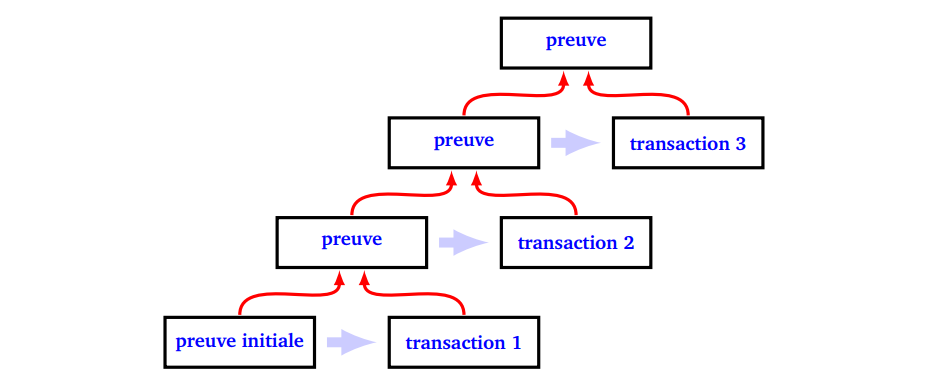

In [22]:
from IPython.display import Image
Image(filename='fig1.png')


La preuve de travail que l’on calcule dépend de la transaction précédente mais aussi de la preuve de
travail précédente, qui elle même dépend des données antérieures... Ainsi, chaque nouvelle preuve de
travail dépend en fait de tout ce qui a été écrit depuis le début (même si le calcul ne porte explicitement
que sur les deux dernières entrées).   
Quelqu’un qui voudrait truquer une transaction passée devrait recalculer toutes les preuves de travail
qui viennent après. Ceci n’est pas possible pour une personne seule : il y a plusieurs preuves de travail à
calculer et chaque preuve demande beaucoup de calculs

### Activité 2 (Outils pour les listes).
Objectifs : construire des fonctions utiles pour manipuler les listes d’entiers dans les activités
suivantes.   
Nos listes sont des listes d’entiers compris entre 0 et 99.   
1.Programme une fonction **addition(liste1,liste2)** qui additionne terme à
terme et modulo 100, les éléments de deux listes de même longueur. Par exemple
addition([1,2,3,4,5,6],[1,1,1,98,98,98]) renvoie [2,3,4,2,3,4].

In [23]:
N = 6         # Constante globale de longueur des blocs
Max = [0,0,25] # Constante pour preuve de travail


def addition(liste1,liste2):
    liste_somme = []
    for i in range(len(liste1)):
        liste_somme = liste_somme + [ (liste1[i]+liste2[i]) % 100 ]
    return liste_somme
    
# Test
print("--- Test somme liste ---")   
print(addition([1,2,3,4,5,6],[1,1,1,1,1,1]))

--- Test somme liste ---
[2, 3, 4, 5, 6, 7]


2.On va chercher des listes qui commencent par des zéros (ou bien des zéros puis des nombres assez
petits). Une liste liste est plus petite que la liste liste_max si chaque élément de liste est
inférieur ou égal à chaque élément de même rang de liste_max.   
Par exemple la liste [0,0,1,2,3,4] est plus petite que la liste [0,0,5]. Ce n’est pas le cas de la
liste [0,10,0,1,1]. Autre exemple : être plus petit que la liste [0,0,0] cela signifie commencer
par trois zéros. Être plus petit que la liste [0,0,1] signifie commencer par [0,0,0] ou [0,0,1].   
Programme une fonction **est_plus_petit(liste,liste_max)** qui renvoie « vrai » lorsque liste
est plus petite que liste_max.

In [24]:
def est_plus_petit(liste,liste_max):
    i = 0
    n = len(liste_max)
    while (i < n) and (liste[i] <= liste_max[i]):
        i = i + 1
    if i == n:
        return True
    else:
        return False
    
# Test
print("--- Test plus petit liste ---")   
print(est_plus_petit([0,0,24,4,5,6],[0,0,50]))


--- Test plus petit liste ---
True


3.On aura besoin de transformer une phrase en une liste de nombres. De plus, on va découper nos
listes en blocs de taille N (avec N = 6), on rajoute donc des zéros en début de liste afin qu’elle soit
de longueur un multiple de N.   
Écris une fonction **phrase_vers_liste(phrase)** qui convertit une chaîne de caractères en liste
d’entiers entre 0 et 99 et si besoin rajoute des zéros devant afin que la liste ait la bonne taille.   
La formule à utiliser pour convertir un caractère en un entier strictement inférieur à 100 est :
ord(c) % 100   
Par exemple : si phrase = "Vive moi !" alors la fonction renvoie :
[0, 0, 86, 5, 18, 1, 32, 9, 11, 5, 32, 33]   
Le caractère "i" à pour code ASCII/unicode 105 donc, modulo 100, le nombre est 5. Note que la
fonction ajoute deux 0 en début de liste afin d’avoir une longueur qui est un multiple de N = 6.

In [25]:
def phrase_vers_liste(phrase):
    # Transforme lettres en nombre modulo 100
    liste = [ord(c) % 100 for c in phrase]

    # Rajoute des 0 devant si besoin
    while len(liste) % N > 0:
        liste = [0] + liste

    return liste

# Test
print("--- Phrase vers liste ---")
phrase = "Vive moi !" 
print(phrase)
print(phrase_vers_liste(phrase))  


--- Phrase vers liste ---
Vive moi !
[0, 0, 86, 5, 18, 1, 32, 9, 11, 5, 32, 33]


### Activité 3 (Fonction de hachage).
Objectifs : créer une fonction de hachage. À partir d’un long message nous calculons une courte
empreinte. Il est difficile de trouver deux messages différents ayant la même empreinte.

Dans cette activité, notre message est une liste d’entiers (entre 0 et 99) de longueur un multiple quelconque
de N = 6, nous le transformons en une liste de longueur N = 6 : son empreinte (ou hash). Voici des
exemples de ce que va faire notre fonction de hachage :   
• la liste [1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6] a pour empreinte :
[10, 0, 58, 28, 0, 90]   
• la liste [1, 1, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6] a pour empreinte :
[25, 14, 29, 1, 19, 6]   
L’idée est de mélanger les nombres par bloc de N = 6 entiers, puis de combiner ce bloc au suivant et de
recommencer, jusqu’à obtenir un seul bloc.  
#### 1. Un tour.
Pour un bloc $[b_0, b_1, b_2, b_3, b_4, b_5]$ de taille N = 6, faire un tour consiste à faire les opérations
suivantes :   
(a) On additionne certains entiers :   
$$[b_0', b_1', b_2', b_3', b_4', b_5'] =[b_0, b_1+b_0, b_2, b_3+b_2, b_4, b_5+b_4]$$   
(b) On multiplie ces entiers par des nombres premiers (dans l’ordre 7, 11, 13, 17, 19, 23) et on rajoute1 :    
$[b_0'', b_1'', b_2'', b_3'', b_4'', b_5'']$ =$ [7b_0'+1 , 11×b_1'+1 , 13×b_2'+1 , 17× b_3'+1 , 19× b_4'+1 , 23×b_5'+1]$   
(c) On effectue une permutation circulaire (le dernier passe devant) :   
$$[b_0''', b_1''', b_2''', b_3''', b_4''', b_5'''] = [ b_5''',b_0''', b_1''', b_2''', b_3''', b_4''']$$
(d) On réduit chaque entier modulo 100 afin d’obtenir des entiers entre 0 et 99


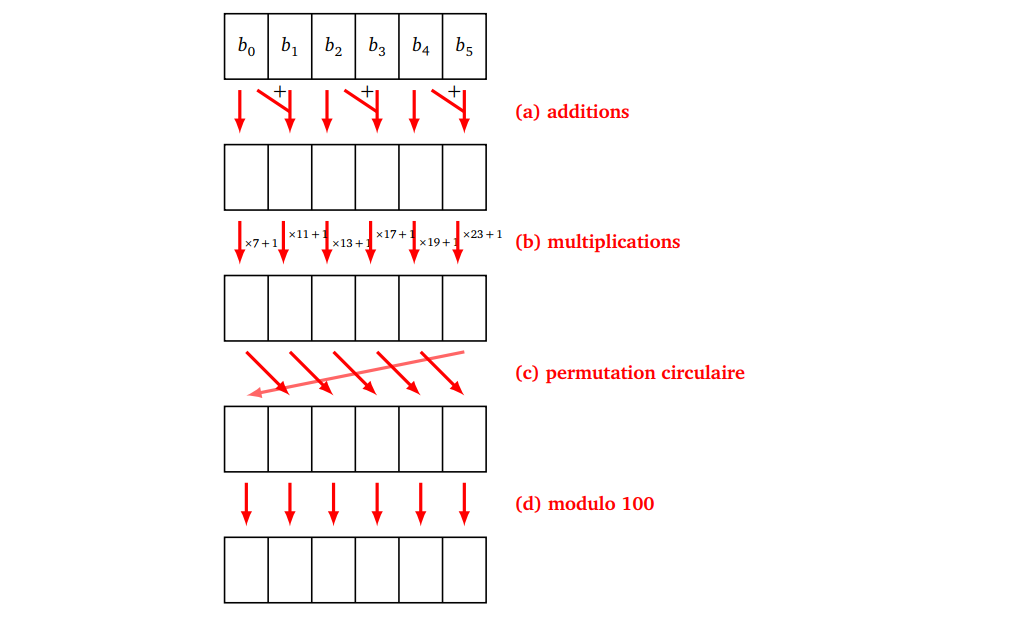

In [26]:
Image(filename='fig2.png')


Partant du bloc [0,1, 2,3, 4,5], on a donc successivement :   
(a) additions : [0, 1,2, 5,4, 9]   
(b) multiplications :    
[7 × 0 + 1,11 × 1 + 1,13 × 2 + 1,17 × 5 + 1,19 × 4 + 1,23 × 9 + 1] =
[1,12, 27,86, 77,208]   
(c) permutation : [208,1, 12,27, 86,77]   
(d) réduction modulo 100 : [8,1, 12,27, 86,77]   
Programme un telle fonction un_tour(bloc) qui renvoie la transformation du bloc après ces
opérations. Vérifie que le bloc [1, 1,2, 3,4,5] est transformé en [8, 8,23,27, 86,77].   

In [27]:
p = [7,11,13,17,19,23] # nb premiers
N=6
def un_tour(bloc):
    # Addition
    bloc[1] = (bloc[1]+bloc[0]) % 100
    bloc[3] = (bloc[3]+bloc[2]) % 100
    bloc[5] = (bloc[5]+bloc[4]) % 100

    # m = p*m + 1 (modulo 100)
    for i in range(N):
        bloc[i] = (p[i]*bloc[i]+1) %  100
    # permutation
    bloc = [bloc[N-1]] + bloc[:N-1]
    return bloc

# Test
print("--- Test un tour ---")

print([0,1,2,3,4,5]," est transformé en un tour en ",un_tour([0,1,2,3,4,5]))

print([1,1,2,3,4,5]," est transformé en un tour en ",un_tour([1,1,2,3,4,5]))


--- Test un tour ---
[0, 1, 2, 3, 4, 5]  est transformé en un tour en  [8, 1, 12, 27, 86, 77]
[1, 1, 2, 3, 4, 5]  est transformé en un tour en  [8, 8, 23, 27, 86, 77]


### 2. Dix tours.
Pour bien mélanger chaque bloc, programme une fonction dix_tours(bloc) qui itère dix fois les
opérations précédentes. Après 10 tours :   
• le bloc [0,1, 2,3, 4,5] devient [98, 95,86, 55,66, 75],    
• le bloc [1,1, 2,3, 4,5] devient [18, 74,4, 42,77, 42].    
Deux blocs proches sont transformés en deux blocs très différents ! 

In [28]:
def dix_tours(bloc):
    for i in range(10):
        bloc = un_tour(bloc)
    return bloc

# Test
print("--- Test dix tours ---")
bloc = [0,1,2,3,4,5]
print(bloc)
print(" est transformé en dix tours en ",dix_tours(bloc),"\n")

bloc = [1,1,2,3,4,5]
print(bloc)
print(" est transformé en dix tours en ",dix_tours(bloc),"\n")

bloc = [99,96,87,56,67,76]
print(bloc)
print(" est transformé en dix tours en ",dix_tours(bloc),"\n")

bloc = [70,92,22,4,16,90]
print(bloc)
print(" est transformé en dix tours en ",dix_tours(bloc))


--- Test dix tours ---
[0, 1, 2, 3, 4, 5]
 est transformé en dix tours en  [98, 95, 86, 55, 66, 75] 

[1, 1, 2, 3, 4, 5]
 est transformé en dix tours en  [18, 74, 4, 42, 77, 42] 

[99, 96, 87, 56, 67, 76]
 est transformé en dix tours en  [60, 82, 12, 94, 6, 80] 

[70, 92, 22, 4, 16, 90]
 est transformé en dix tours en  [77, 91, 5, 91, 89, 99]



   
### 3. Hachage d’une liste.
Partant d’une liste de longueur un multiple de N = 6, on la découpe en blocs de longueur 6 et on
calcule l’empreinte de cette liste selon l’algorithme suivant :   
•On extrait le premier bloc de la liste, on effectue 10 tours de mélange.
• On ajoute terme à terme (et modulo 100), le résultat de ce mélange au second bloc.   
• On recommence en partant du nouveau second bloc.   
• Lorsqu’il ne reste plus qu’un bloc, on effectue 10 tours de mélange, le résultat est l’empreinte de
la liste.   
Voici le schéma d’une situation avec trois blocs : dans un premier temps il y a trois blocs (A,B,C) ;    
dans un second temps il ne reste plus que deux bloc (B’ et C) ; à la fin il ne reste qu’un bloc (C”) :    
c’est l’empreinte !

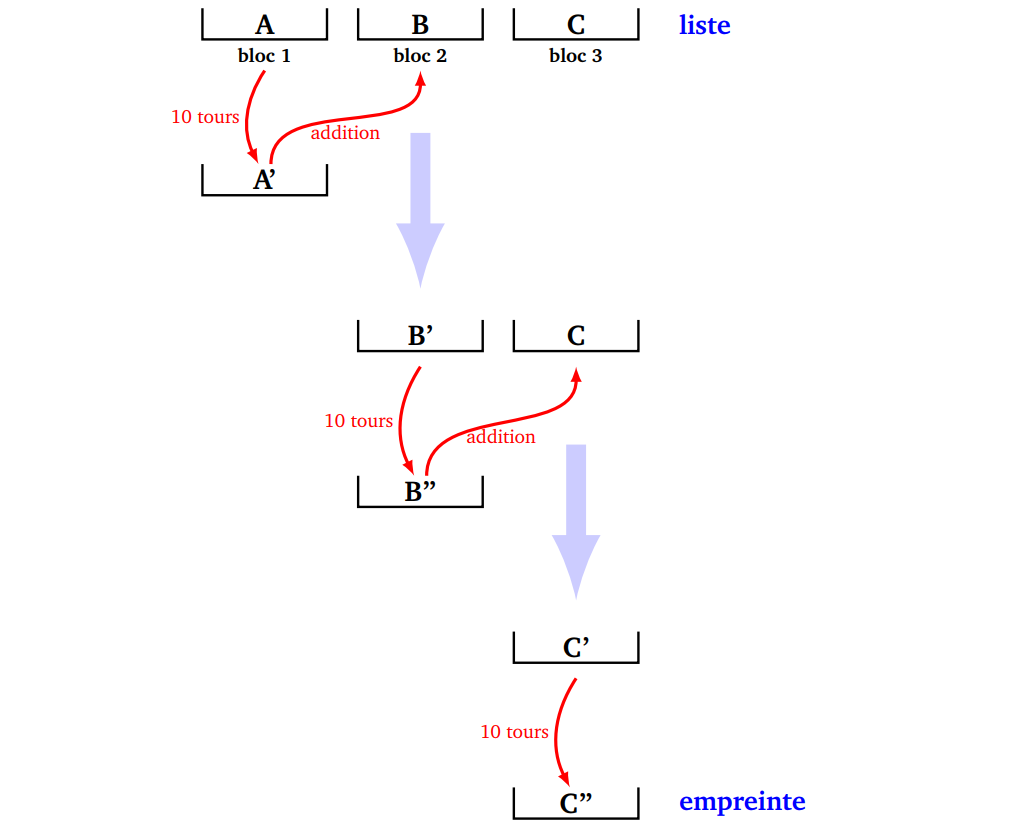

In [29]:
Image(filename='fig3.png')


Exemple avec la liste [0,1, 2,3, 4,5, 1,1, 1,1, 1,1, 1,10, 10,10, 10,10, 10].   
• Le premier bloc est [0, 1,2, 3,4, 5], son mélange à 10 tours est [98,95, 86,55, 66,75].    
• On ajoute ce mélange au second bloc [1,1,1,1,1,1] (voir la fonction addition() de l’activité
2).    
• La liste restante est maintenant [99,96, 87,56, 67,76, 10,10, 10,10, 10,10].   
• On recommence. Le nouveau premier bloc est [99, 96, 87, 56, 67, 76], son mélange à 10 tours vaut
[60,82,12,94,6,80], on l’ajoute au dernier bloc [10,10,10,10,10,10] pour obtenir (modulo
100) [70, 92,22, 4,16, 90].   
• On effectue un dernier mélange à 10 tours pour obtenir l’empreinte : [77, 91,5, 91,89, 99].   
Programme une fonction **hachage(liste)** qui renvoie l’empreinte d’une liste. Teste-la sur les
exemples donnés au début de l’activité.

In [30]:
def hachage(liste):

    while len(liste)>N:
        bloc1 = liste[0:N]  # Premier bloc
        bloc2 = liste[N:2*N] # Second bloc
        fin_liste = liste[2*N:] # Le reste
        # print(bloc1)
        # print(bloc2)
        # print(fin_liste)

        #bloc1 = un_tour(bloc1)   # Un tour
        bloc1 = dix_tours(bloc1) # Dix tours

        #print(bloc1)

        nouv_bloc_deb = addition(bloc1,bloc2)
        liste = nouv_bloc_deb + fin_liste

    # Tours de fin pour la liste (qui ne contient plus que N nb)
    # liste = un_tour(liste) # Un tour
    liste = dix_tours(liste) # Un tour

    return liste

# Test
print("--- Hachage d'une liste ---")

liste= [0,1, 2,3, 4,5, 1,1, 1,1, 1,1,10, 10,10, 10,10, 10]
hach = hachage(liste)
print("liste: ",liste)
print("hach: ",hach,"\n")

liste = [1,2,3,4,5,6,1,2,3,4,5,6]
hach = hachage(liste)
print("liste: ",liste)
print("hach: ",hach,"\n")

liste = [1,1,3,4,5,6,1,2,3,4,5,6]
hach = hachage(liste)
print("liste un poil differente: ",liste)
print("hach completement different: ",hach)


--- Hachage d'une liste ---
liste:  [0, 1, 2, 3, 4, 5, 1, 1, 1, 1, 1, 1, 10, 10, 10, 10, 10, 10]
hach:  [77, 91, 5, 91, 89, 99] 

liste:  [1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6]
hach:  [10, 0, 58, 28, 0, 90] 

liste un poil differente:  [1, 1, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6]
hach completement different:  [25, 14, 29, 1, 19, 6]


## Activité 4 (Preuve de travail - Minage).
*Objectifs : construire un mécanisme de preuve de travail à l’aide de notre fonction de hachage.*   
On va construire un problème compliqué à résoudre, pour lequel, si quelqu’un nous donne la solution,
alors il est facile de vérifier qu’elle convient.   
**Problème à résoudre.**    
On nous donne une liste, il s’agit de trouver un bloc tel que, lorsque qu’on le
rajoute à la liste, cela produit un hachage commençant par des zéros.    
Plus précisément étant donné une
liste liste et un objectif maximal Max, il s’agit de trouver un bloc preuve qui, concaténé à la liste puis
haché, est plus petit que la liste Max, c’est-à-dire :   
<p align="center"><b>hachage(liste + preuve) plus petit que Max</b></p>
La liste est de longueur quelconque (un multiple de N = 6), la preuve est un bloc de longueur N, l’objectif
est de trouver une liste commençant par des 0 (voir l’activité 2).    

Par exemple : soit la liste = [0,1,2,3,4,5] et Max = [0,0,7]. Quel bloc preuve puis-je concaténer à liste pour résoudre mon problème ?   
+ preuve = [12, 3, 24, 72, 47, 77] convient car concaténé à notre liste cela donne
[0,1,2,3,4,5,12, 3, 24, 72, 47, 77] et le hachage de toute cette liste vaut
[0, 0, 5, 47, 44, 71] qui commence par [0,0,5] plus petit que l’objectif.   
+  preuve = [0, 0, 2, 0, 61, 2] convient aussi car après concaténation on a
[0,1,2,3,4,5,0, 0, 2, 0, 61, 2] dont le hachage donne [0, 0, 3, 12, 58, 92].   
+  [97, 49, 93, 87, 89, 47] ne convient pas, car après concaténation puis hachage on obtient
[0, 0, 8, 28, 6, 60] qui est plus grand que l’objectif voulu.   
#### 1. Vérification (facile).
Programme une fonction **verification_preuve_de_travail(liste,preuve)** qui renvoie vrai
si la solution preuve proposée convient pour liste. Utilise la fonction **est_plus_petit()** de l’activité 2.

In [35]:
from time import time
def verification_preuve_de_travail(liste,preuve):

    liste_test = liste + preuve
    hach = hachage(liste_test)
    # print(preuve,hach)
    if est_plus_petit(hach,Max):
        return True
    else:
        return False

# Test
print("--- Verif Preuve de travail ---")    

liste = [0,1,2,3,4,5]
preuve = [12, 3, 24, 72, 47, 77]
Max = [0,0,7]

start_time = time()
print(verification_preuve_de_travail(liste,preuve))
end_time = time()
duree = end_time-start_time

print("Temps de calcul :",duree)


--- Verif Preuve de travail ---
True
Temps de calcul : 0.0


#### 2. Recherche de solution (difficile).
Programme une fonction **preuve_de_travail(liste)** qui cherche un bloc preuve solution à
notre problème pour la liste donnée.   
*Indications.*   
• La méthode la plus simple est de prendre un bloc preuve de nombres au hasard et de recommencer
jusqu’à trouver une solution.   
• Tu peux aussi tester systématiquement tous les blocs en commençant avec [0,0,0,0,0,0], puis
[0,0,0,0,0,1]. . . et t’arrêter au premier qui convient.   
• Tu ajustes la difficulté du problème en changeant l’objectif : facile avec Max = [0,0,50], moyen
avec Max = [0,0,5], difficile avec Max = [0,0,0], trop difficile avec Max = [0,0,0,0].    
• Comme il existe plusieurs solutions, tu n’obtiens pas nécessairement la même solution à chaque•
recherche.   


In [46]:
from random import randint
def preuve_de_travail(liste):
    hach = [1,1,1,1,1,1]
    while not(est_plus_petit(hach,Max)): 
        preuve = [randint(0,99) for i in range(N)]
        liste_test = liste + preuve
        hach = hachage(liste_test)
    #print(preuve,hach)
    return preuve

liste=[0,1,2,3,4,5]
Max = [0,0,7]
preuve=preuve_de_travail(liste)
print ("pour ",liste," une preuve de travail est ",preuve)

print("la verif est ",verification_preuve_de_travail(liste,preuve))

from itertools import product

def preuve_de_travail_bis(liste):
    for preuve in product(range(100),range(100),range(100),range(100),range(100),range(100)):
        preuve = list(preuve)
        liste_test = liste + preuve
        hach = hachage(liste_test)
        if est_plus_petit(hach,Max):
            break
    print(preuve,hach)
    return preuve


pour  [0, 1, 2, 3, 4, 5]  une preuve de travail est  [40, 32, 43, 56, 5, 25]
la verif est  True


#### 3. Temps de calcul.
•Compare le temps de calcul d’une simple vérification par rapport au temps de recherche d’une solution.   
•Choisis l’objectif Max de sorte que la recherche d’une preuve de travail nécessite environ entre 30 et
60 secondes de calculs.   
Pour le bitcoin, ceux qui calculent des preuves de travail sont appelés les mineurs. Le premier qui trouve
une preuve gagne une récompense. La difficulté du problème est ajustée de sorte que le temps de calcul
mis par le gagnant (parmi l’ensemble de tous les mineurs) pour trouver une solution, soit d’environ 10
minutes.

In [47]:
# Test
print("--- Preuve de travail ---")    

start_time = time()
liste = [0,1,2,3,4,5]
preuve = preuve_de_travail(liste)
# preuve = preuve_de_travail_bis(liste)
end_time = time()
duree = end_time-start_time

print("Temps de calcul :",duree)



--- Preuve de travail ---
Temps de calcul : 13.862920999526978


## Activité 5 (Tes bitcoins).
Objectifs : créer un livre de compte (appelé blockchain pour le bitcoin) qui enregistre toutes
les transactions, ce registre est public et certifié. Il est pratiquement impossible d’y falsifier une
transaction déjà inscrite.

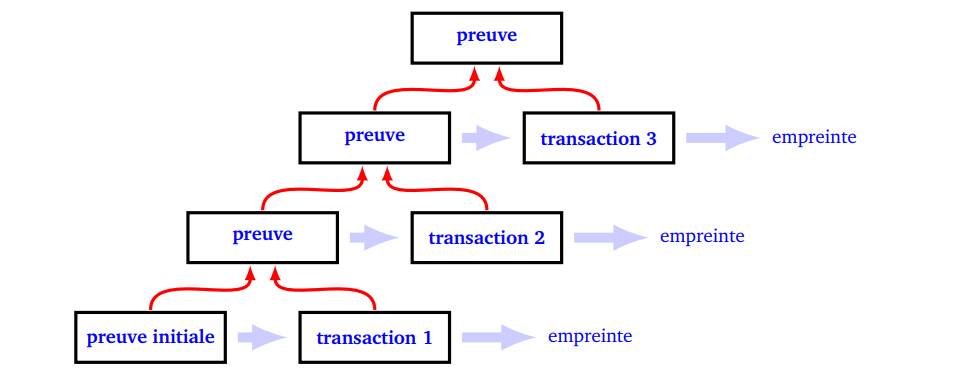

In [42]:
Image(filename='fig4.png')


#### 1. Initialisation et ajout d’une transaction.

(a) Initialise une variable globale Livre qui est une liste et contient au départ une preuve nulle :   
Livre = [ [0,0,0,0,0,0] ] .   
(b) Une transaction est une chaîne de caractères comprenant un nom et la somme à ajouter (ou à
retrancher) à son compte. Par exemple "Abel +25" ou "Barbara -45".   
Programme une fonction **ajout_transaction(transaction)** qui ajoute
la chaine de caractère transaction à la liste Livre. Par exemple
après l’initialisation ajout_transaction("Camille +100"), Livre vaut
[ [0, 0, 0, 0, 0, 0], "Camille +100" ]. Attention, pour pouvoir modifier Livre il
faut commencer la fonction par : global Livre.   

In [48]:
preuve_init = [0,0,0,0,0,0]   # valeur au pif
Livre = [preuve_init]

def ajout_transaction(transaction):
    global Livre
    Livre = Livre + [transaction]
    return Livre

# Test
print("--- CrÃ©ation du livre et ajout d'une transaction ---")
print(Livre)
ajout_transaction("Bob +135")
print(Livre)


--- CrÃ©ation du livre et ajout d'une transaction ---
[[0, 0, 0, 0, 0, 0]]
[[0, 0, 0, 0, 0, 0], 'Bob +135']


2.Dès qu’une transaction est ajoutée, il faut calculer et ajouter au livre de comptes une preuve de travail.
Programme une fonction **minage()**, sans paramètre, qui ajoute une preuve de travail au livre.   
Voici comment faire :   
• On prend la dernière transaction transaction, on la transforme en une liste d’entiers par la
fonction phrase_vers_liste() de l’activité 2.   
• On prend la preuve de travail prec_preuve située juste avant cette transaction.   
• On forme la liste liste composée d’abord des éléments de prec_preuve, puis des éléments de
la liste d’entiers obtenue en convertissant la chaîne transaction.  
• On calcule une preuve de travail de cette liste.   
• On ajoute cette preuve au livre de compte.   
Par exemple si le livre se termine par :   
$$[3, 1, 4, 1, 5, 9], "Abel +35"$$   
alors après calcul de la preuve de travail le livre se termine par exemple par :   
$$[3, 1, 4, 1, 5, 9], "Abel +35", [32, 17, 37, 73, 52, 90]   $$
On rappelle que la preuve de travail n’est pas unique et qu’en plus elle dépend de l’objectif Max.   

In [49]:
def minage():
    global Livre
    transaction = Livre[-1]
    prec_preuve = Livre[-2]
    # print(transaction)
    # print(prec_hach)
    # print(phrase_vers_liste(transaction))
    liste = prec_preuve + phrase_vers_liste(transaction)

    preuve = preuve_de_travail(liste)

    Livre = Livre + [preuve]

    return Livre

# Test
print("--- Minage  ---")
print(Livre)
minage()
print(Livre)

# Exemple pour fiche
print("--- Exemple pour fiche  ---")
Max = [0,0,7]
hach_init = [3,1,4,1,5,9]   # valeur au pif
Livre = [hach_init]
ajout_transaction("Abel +35")
print(Livre)
minage()
print(Livre)


--- Minage  ---
[[0, 0, 0, 0, 0, 0], 'Bob +135']
[[0, 0, 0, 0, 0, 0], 'Bob +135', [55, 83, 77, 71, 52, 7]]
--- Exemple pour fiche  ---
[[3, 1, 4, 1, 5, 9], 'Abel +35']
[[3, 1, 4, 1, 5, 9], 'Abel +35', [19, 7, 99, 63, 91, 14]]


3.Une seule personne à la fois ajoute une preuve de travail. Par contre tout le monde a la possibilité de vérifier que la preuve proposée est correcte (et devrait le faire).  
Écris une fonction
**verification_livre()**, sans paramètre, qui vérifie que la dernière preuve ajoutée au Livre
est valide.

In [50]:
def verification_livre():
    prec_preuve = Livre[-3]        
    transaction = Livre[-2]
    preuve = Livre[-1]
    hach = hachage(prec_preuve+phrase_vers_liste(transaction)+preuve)
    if est_plus_petit(hach,Max):
        return True
    else:
        return False


# Test
print("--- VÃ©rification du livre  ---")
print(Livre)
print(verification_livre())


--- VÃ©rification du livre  ---
[[3, 1, 4, 1, 5, 9], 'Abel +35', [19, 7, 99, 63, 91, 14]]
True


4.Écris un livre de compte qui correspond aux données suivantes :   
• On prend Max = [0,0,5] et au départ Livre = [ [0,0,0,0,0,0] ].   
• "Alfred -100" (Alfred doit 100 bitcoins).   
• Barnabé en reçoit 150.   
• Chloé gagne 35 bitcoins.   

Conclusion : imaginons que Alfred veuille tricher, il veut changer le livre de compte afin de recevoir 100
bitcoins au lieu d’en devoir 100.   
Il doit donc changer la transaction le concernant en "Alfred +100"
mais il doit alors recalculer une nouvelle preuve de travail ce qui est compliqué, surtout il doit aussi recalculer la preuve de la transaction de Barnabé et aussi celle de la transaction de Chloé !   
Quelqu’un qui veut modifier une transaction doit modifier toutes les preuves de travail suivantes.   
Si chaque preuve demande suffisamment de temps de calcul ceci est impossible.    Pour le bitcoin, chaque preuve demande énormément de calculs (trop pour une personne seule) et une nouvelle preuve est à calculer toutes les 10 minutes. Il est donc impossible pour une personne de modifier une transaction passée.   

L’autre aspect du bitcoin que nous n’avons pas abordé, c’est de s’assurer de l’identité de chaque personne
impliquée, afin que personne ne puisse récupérer l’argent d’un autre.    
Ceci est rendu possible grâce à la
cryptographie à clé privée/clé publique (système RSA). Chaque compte est identifié par une clé publique
(deux très grands entiers), ce qui garantit l’anonymat. Mais surtout, seul celui qui possède la clé privée du
compte (un grand entier) peut accéder à ses bitcoins.

In [51]:
# Exemple complet

# Constante pour preuve de travail
Max = [0,0,7]


start_time = time()  # dÃ©but chrono

hach_init = [0,0,0,0,0,0]   # valeur au pif
Livre = [hach_init]

print(Livre)
ajout_transaction("Abel +135")
print(Livre)
minage()
print(Livre)
print(verification_livre())

ajout_transaction("Bob -77")
print(Livre)
minage()
print(Livre)
print(verification_livre())

ajout_transaction("Camille -25")
print(Livre)
minage()
print(Livre)
print(verification_livre())

end_time = time()
duree = end_time-start_time
print("Temps de calcul :",duree)

[[0, 0, 0, 0, 0, 0]]
[[0, 0, 0, 0, 0, 0], 'Abel +135']
[[0, 0, 0, 0, 0, 0], 'Abel +135', [82, 17, 93, 72, 86, 66]]
True
[[0, 0, 0, 0, 0, 0], 'Abel +135', [82, 17, 93, 72, 86, 66], 'Bob -77']
[[0, 0, 0, 0, 0, 0], 'Abel +135', [82, 17, 93, 72, 86, 66], 'Bob -77', [58, 73, 93, 96, 56, 40]]
True
[[0, 0, 0, 0, 0, 0], 'Abel +135', [82, 17, 93, 72, 86, 66], 'Bob -77', [58, 73, 93, 96, 56, 40], 'Camille -25']
[[0, 0, 0, 0, 0, 0], 'Abel +135', [82, 17, 93, 72, 86, 66], 'Bob -77', [58, 73, 93, 96, 56, 40], 'Camille -25', [33, 26, 1, 21, 29, 96]]
True
Temps de calcul : 63.2105929851532
